In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('file:///Users/mengyuanchen/Downloads/ccdefault.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [17]:
from sklearn.model_selection import train_test_split
y = df.values[:,24]
X = df.values[:,1:24]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
outscores = []
inscores = []
for n in [25,50,100,200,300,400,500,600]:
    rf = RandomForestClassifier(n_estimators = n, n_jobs = -1)
    cvscores = cross_val_score(rf, X_train, y_train, cv=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    inscores.append(np.mean(cvscores))
    outscores.append(accuracy_score(y_test,y_pred))
print("in-sample CV scores:",inscores)
print("out-of-sample scores:",outscores)

in-sample CV scores: [0.8105926232840565, 0.8139262997612665, 0.814518179098668, 0.8150368212111678, 0.8149627059594222, 0.8155923767057571, 0.8160738171721439, 0.8162220612254009]
out-of-sample scores: [0.8163333333333334, 0.8203333333333334, 0.823, 0.823, 0.8256666666666667, 0.8256666666666667, 0.825, 0.825]


 1) PAY_0                          0.096575
 2) AGE                            0.067550
 3) BILL_AMT1                      0.060634
 4) LIMIT_BAL                      0.059847
 5) BILL_AMT2                      0.054583
 6) BILL_AMT3                      0.051778
 7) PAY_AMT1                       0.051496
 8) BILL_AMT6                      0.050935
 9) BILL_AMT4                      0.050582
10) BILL_AMT5                      0.049882
11) PAY_AMT2                       0.047633
12) PAY_AMT6                       0.046266
13) PAY_AMT3                       0.046204
14) PAY_2                          0.044415
15) PAY_AMT5                       0.043602
16) PAY_AMT4                       0.043184
17) PAY_3                          0.026067
18) PAY_4                          0.022281
19) PAY_5                          0.021189
20) EDUCATION                      0.020479
21) PAY_6                          0.018620
22) MARRIAGE                       0.014145
23) SEX                         

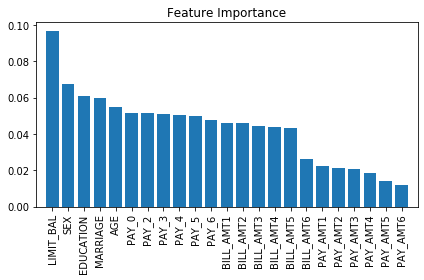

In [21]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=600,random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
print("My name is {Mengyuan Chen}")
print("My NetID is: {mchen100}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")